Tugas Naive Bayes dan KNN

**Nama: Siwi Nafisah Faida
NIM: 4101422034**

Akan dilakukan pre-processing data terlebih dahulu

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [603]:
#pemanggilan data
data = pd.read_csv("Churn_Modelling.csv")

In [604]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [605]:
data.tail(5)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [606]:
#melihat statistika deskriptif
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [607]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 17 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 5042 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 5042, maka akan dilakukan proses identifikasi lebih lanjut.

# Deteksi Missing value

In [608]:
data.isnull()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      False    False          False      False           False   
1      False    False          False      False           False   
2      False    False          False      False           False   
3      False    False          False      False           False   
4      False    False          False      False           False   
...      ...      ...            ...        ...             ...   
9995   False    False          False      False           False   
9996   False    False          False      False           False   
9997   False    False          False      False           False   
9998   False    False          False      False           False   
9999   False    False          False      False           False   

      EstimatedSalary  Exited  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
9995            False   False  
9996            False   False  
9997            False   False  
9998            False   False  
9999            False   False  

[10000 rows x 14 columns]

In [609]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Berdasarkan output summarize tersebut, diperoleh bahwa tidak ada missing value dalam dataset

In [610]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(0)

Jadi, dataset ini tidak memiliki missing value sehingga tidak perlu melakukan handling missing value

#CEK DAN PENANGANAN OUTLIER

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:

Boxplot → Visualisasi distribusi dan outlier
Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

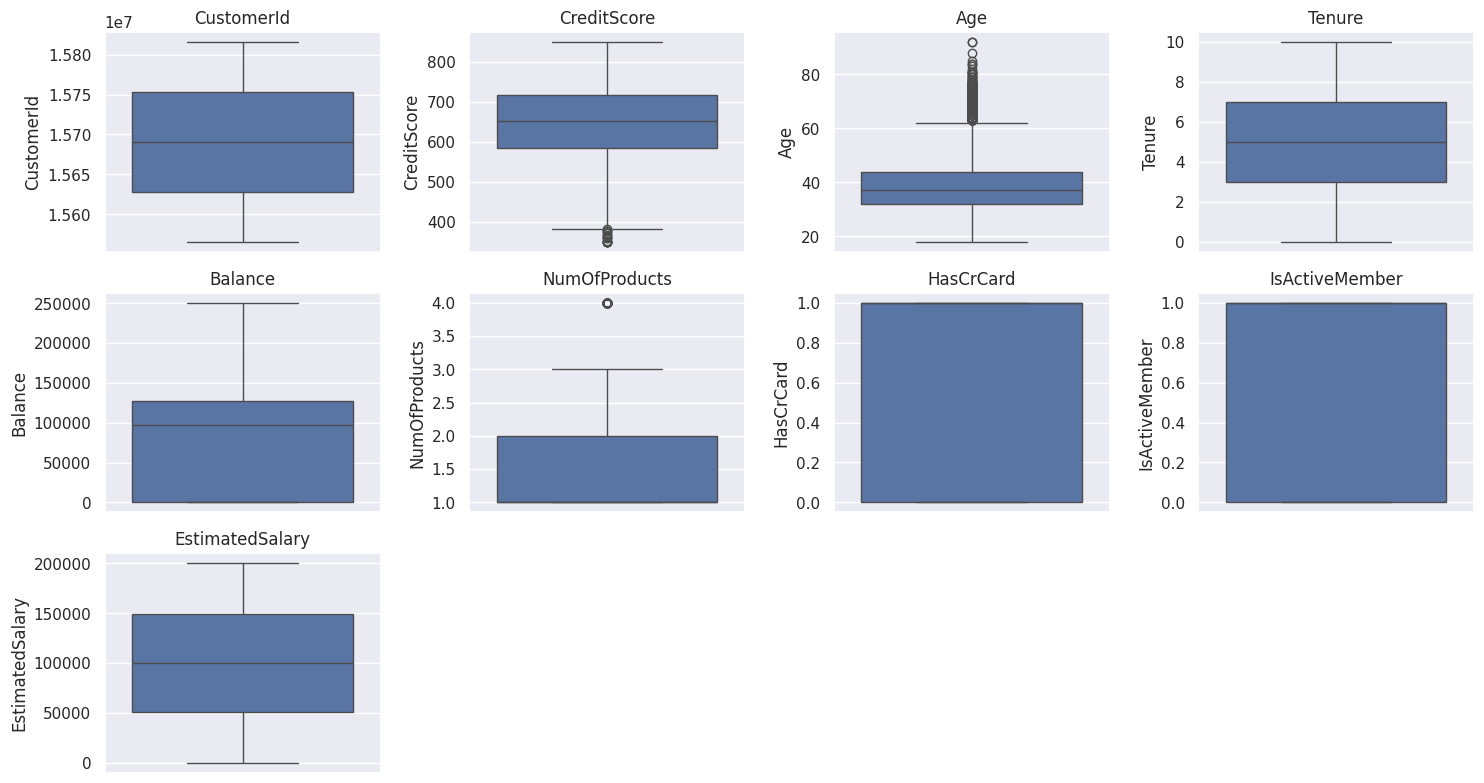

In [611]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = [ 'CustomerId', 'CreditScore', 'Age', 'Tenure',
            'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
             'EstimatedSalary']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Berdasarkan output di atas, dapat terlihat bahwa yang memiliki outlier adalah CreditScore, Age, dan NumOfProducts

Selanjutnya, dapat diidentifikasi outlier dari IQR sebagai berikut:

**2. IQR**

In [612]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


CustomerId: 0 outliers
CreditScore: 15 outliers
Age: 359 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers


Penanganan Outlier

Berdasarkan jumlah dan dampak outlier, ada beberapa metode yang bisa digunakan:

📌 A. Winsorizing (Mengganti Outlier dengan Batas IQR)

Alasan: Jika data penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil.

📌 B. Menghapus Outlier (Jika Jumlahnya Sedikit dan Tidak Signifikan)

Alasan: Jika jumlah outlier sangat sedikit dan tidak mempengaruhi distribusi data, bisa dihapus. nb. hal ini tidak akan kita lakukan karena bisa mempengaruhi dimensi data

Metode penangan Outlier yang dipilih adalah **Windorizing**

**Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [613]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

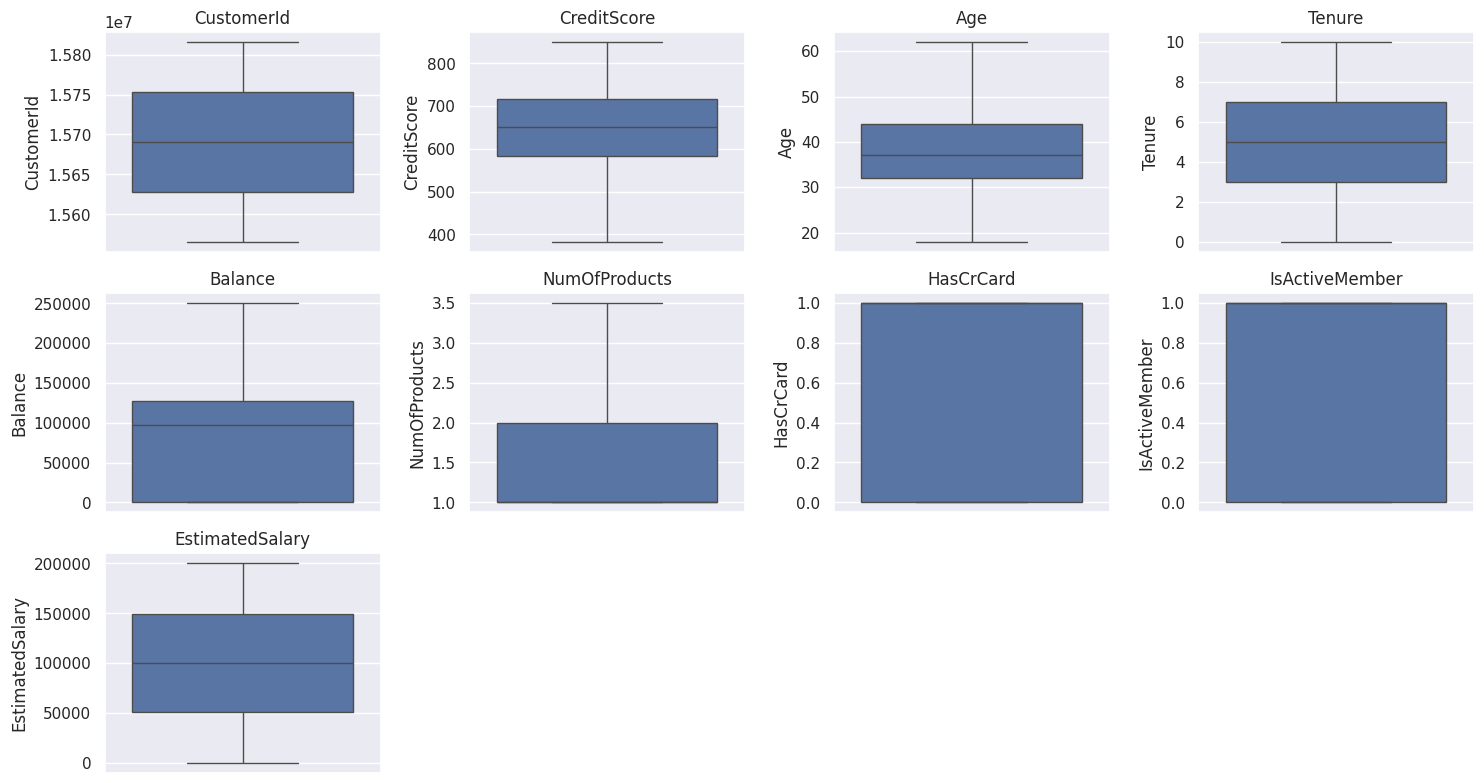

In [614]:
#cek boxplot lagi

num_cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure',
            'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
            'EstimatedSalary']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Dari output di atas, telah terlihat bahwa dataset sudah tidak mengandung outlier.

#ENCODING

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.

**Metode Encoding dalam Machine Learning Ada beberapa metode encoding yang umum digunakan, tergantung pada jenis dan karakteristik data kategorik:**

**One-Hot Encoding (OHE)** : Mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.

**Ordinal Encoding** : Mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas (misalnya pendidikan: SD < SMP < SMA)

**Target Encoding** : Menggunakan rata-rata target (misalnya rata-rata skor IMDB berdasarkan negara) untuk mengganti kategori. Digunakan jika data memiliki hubungan statistik yang kuat dengan target.

In [615]:
#melihat isi dalam kolom
data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [616]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [617]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Memilih Metode Encoding yang Cocok untuk Data Pada dataset ini, terdapat dua kolom kategorik:**

Surname → Berisi nama nama belakang

Geography → Berisi nama negara

Gender → Berisi jenis kelamin


In [618]:
import hashlib

def hash_encode(value):
    return int(hashlib.md5(value.encode()).hexdigest(), 16) % 1000  # hasil 0–999

#memasukkan hasil encoding ke dalam data
data['surname'] = data['Surname'].apply(hash_encode)

Menggunakan Hashing Encoding karena data pada kolom surname merupakan data yang sangat banyak dan beragam, sehingga tidak memungkinkan menggunakan OHE, Ordinal Encoding, atau Target Encoding

In [619]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1  15634602.0  Hargrave        619.0    France  Female  42.0   
1          2  15647311.0      Hill        608.0     Spain  Female  41.0   
2          3  15619304.0      Onio        502.0    France  Female  42.0   
3          4  15701354.0      Boni        699.0    France  Female  39.0   
4          5  15737888.0  Mitchell        850.0     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00            1.0        1.0             1.0   
1     1.0   83807.86            1.0        0.0             1.0   
2     8.0  159660.80            3.0        1.0             0.0   
3     1.0       0.00            2.0        0.0             0.0   
4     2.0  125510.82            1.0        1.0             1.0   

   EstimatedSalary  Exited  surname  
0        101348.88       1      939  
1        112542.58       0      694  
2        113931.57       1      420  
3         93826.63       0      744  
4         79084.10       0       54

In [620]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

One_encoder = OneHotEncoder (handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

geography = One_encoder.fit_transform(data[['Geography']])

Menggunakan OHE(One-Hot Encoding) karena jumlah kategori dalam kolom Geography tidak terlalu banyak.

In [621]:
geography.head()

Geography_France  Geography_Germany  Geography_Spain
0               1.0                0.0              0.0
1               0.0                0.0              1.0
2               1.0                0.0              0.0
3               1.0                0.0              0.0
4               0.0                0.0              1.0

In [622]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

One_encoder = OneHotEncoder (handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

gender = One_encoder.fit_transform(data[['Gender']])

Menggunakan OHE(One-Hot Encoding) karena jumlah kategori dalam kolom Gender tidak terlalu banyak.

In [623]:
gender.head()

Gender_Female  Gender_Male
0            1.0          0.0
1            1.0          0.0
2            1.0          0.0
3            1.0          0.0
4            1.0          0.0

In [624]:
#menghapus kolom Surname yang belum diencoding
data.drop('Surname', axis=1, inplace=True)

In [625]:
#memasukkan kolom encoding geography dan gender (kolom encoding surname sudah dimasukkan sebelumnya) ke dalam tabel dataset
data = pd.concat([data, geography], axis=1).drop(columns=['Geography'])
data = pd.concat([data, gender], axis=1).drop(columns=['Gender'])

In [626]:
data.head()

RowNumber  CustomerId  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          1  15634602.0        619.0  42.0     2.0       0.00            1.0   
1          2  15647311.0        608.0  41.0     1.0   83807.86            1.0   
2          3  15619304.0        502.0  42.0     8.0  159660.80            3.0   
3          4  15701354.0        699.0  39.0     1.0       0.00            2.0   
4          5  15737888.0        850.0  43.0     2.0  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  surname  \
0        1.0             1.0        101348.88       1      939   
1        0.0             1.0        112542.58       0      694   
2        1.0             0.0        113931.57       1      420   
3        0.0             0.0         93826.63       0      744   
4        1.0             1.0         79084.10       0       54   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0               1.0                0.0              0.0            1.0   
1               0.0                0.0              1.0            1.0   
2               1.0                0.0              0.0            1.0   
3               1.0                0.0              0.0            1.0   
4               0.0                0.0              1.0            1.0   

   Gender_Male  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [627]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  float64
 2   CreditScore        10000 non-null  float64
 3   Age                10000 non-null  float64
 4   Tenure             10000 non-null  float64
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  float64
 7   HasCrCard          10000 non-null  float64
 8   IsActiveMember     10000 non-null  float64
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  surname            10000 non-null  int64  
 12  Geography_France   10000 non-null  float64
 13  Geography_Germany  10000 non-null  float64
 14  Geography_Spain    10000 non-null  float64
 15  Gender_Female      10000 non-null  float64
 16  Gender_Male        1000

In [628]:
#mengurutkan kolom data seperti data awal
from_index = 10;
to_index = 16;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  float64
 2   CreditScore        10000 non-null  float64
 3   Age                10000 non-null  float64
 4   Tenure             10000 non-null  float64
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  float64
 7   HasCrCard          10000 non-null  float64
 8   IsActiveMember     10000 non-null  float64
 9   EstimatedSalary    10000 non-null  float64
 10  surname            10000 non-null  int64  
 11  Geography_France   10000 non-null  float64
 12  Geography_Germany  10000 non-null  float64
 13  Geography_Spain    10000 non-null  float64
 14  Gender_Female      10000 non-null  float64
 15  Gender_Male        10000 non-null  float64
 16  Exited             1000

In [630]:
from_index = 10;
to_index = 2;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [631]:
from_index = 11;
to_index = 4;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [632]:
from_index = 12;
to_index = 5;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [633]:
from_index = 13;
to_index = 6;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [634]:
from_index = 14;
to_index = 7;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [635]:
from_index = 15;
to_index = 8;


col_to_move = data.columns[from_index]
cols = data.columns.tolist()
cols.pop(from_index)
cols.insert(to_index, col_to_move)

data = data[cols]

In [636]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  float64
 2   surname            10000 non-null  int64  
 3   CreditScore        10000 non-null  float64
 4   Geography_France   10000 non-null  float64
 5   Geography_Germany  10000 non-null  float64
 6   Geography_Spain    10000 non-null  float64
 7   Gender_Female      10000 non-null  float64
 8   Gender_Male        10000 non-null  float64
 9   Age                10000 non-null  float64
 10  Tenure             10000 non-null  float64
 11  Balance            10000 non-null  float64
 12  NumOfProducts      10000 non-null  float64
 13  HasCrCard          10000 non-null  float64
 14  IsActiveMember     10000 non-null  float64
 15  EstimatedSalary    10000 non-null  float64
 16  Exited             1000

Pre-processing data telah selesai dilakukan dan urutan kolom data sudah sesuai dengan urutan kolom data awal.

#MENUJU ANALISIS KLASIFIKASI NAIVE BAYES DAN KNN

In [637]:
import seaborn as sns
sns.set()

In [638]:
data.head()

RowNumber  CustomerId  surname  CreditScore  Geography_France  \
0          1  15634602.0      939        619.0               1.0   
1          2  15647311.0      694        608.0               0.0   
2          3  15619304.0      420        502.0               1.0   
3          4  15701354.0      744        699.0               1.0   
4          5  15737888.0       54        850.0               0.0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male   Age  \
0                0.0              0.0            1.0          0.0  42.0   
1                0.0              1.0            1.0          0.0  41.0   
2                0.0              0.0            1.0          0.0  42.0   
3                0.0              0.0            1.0          0.0  39.0   
4                0.0              1.0            1.0          0.0  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00            1.0        1.0             1.0   
1     1.0   83807.86            1.0        0.0             1.0   
2     8.0  159660.80            3.0        1.0             0.0   
3     1.0       0.00            2.0        0.0             0.0   
4     2.0  125510.82            1.0        1.0             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Setiap baris dalam dataset mewakili satu pelanggan dan kolom-kolomnya merupakan atribut-atribut yang diamati pada pelanggan-pelanggan tersebut. Berikut penjelasan setiap variabel yang ada dalam dataset:

RowNumber: Nomor untuk tiap baris

CustomerId: Nomor yang dapat mengidentifikasi pelanggan

surname: Nama belakang pelanggan

CreditScore: Skor kredit pelanggan pada saat pengumpulan data dilakukan

Geography_France: Pelanggan yang berasal dari Prancis

Geography_Germany: Pelanggan yang berasal dari Jerman

Geography_Spain: Pelanggan yang berasal dari Spanyol

Gender_Female: Pelanggan berjenis kelamin perempuan

Gender_Male: Pelanggan berjenis kelamin laki-laki

Age: Usia pelanggan dalam tahun

Tenure: Jumlah tahun menjadi pelanggan

Balance: Saldo akun pelanggan

NumOfProducts: Jumlah produk yang telah dibeli atau berlangganan

HasCrCard: Menunjukkan apakah pelanggan memiliki kartu kredit (1) atau tidak (0)

IsActiveMember: Menunjukkan apakah pelanggan merupakan pelanggan aktif (1) atau tidak (0)

EstimatedSalary: Perkiraan gaji pelanggan

Exited: Variabel target atau label yang menunjukkan apakah pelanggan telah berhenti berlangganan atau tidak. Label ini umumnya bernilai 1 untuk kasus positif (berhenti berlangganan) dan 0 untuk kasus negatif (tidak berhenti berlangganan)

Dataset ini memberikan informasi yang penting mengenai karakteristik pelanggan yang dapat digunakan untuk memprediksi apakah seorang pelanggan berhenti berlangganan atau tidak.

In [639]:
data.tail(15)

RowNumber  CustomerId  surname  CreditScore  Geography_France  \
9985       9986  15586914.0      692        659.0               1.0   
9986       9987  15581736.0       43        673.0               0.0   
9987       9988  15588839.0      858        606.0               0.0   
9988       9989  15589329.0      864        775.0               1.0   
9989       9990  15605622.0      812        841.0               0.0   
9990       9991  15798964.0      857        714.0               0.0   
9991       9992  15769959.0      185        597.0               1.0   
9992       9993  15657105.0      194        726.0               0.0   
9993       9994  15569266.0       27        644.0               1.0   
9994       9995  15719294.0      848        800.0               1.0   
9995       9996  15606229.0      299        771.0               1.0   
9996       9997  15569892.0      419        516.0               1.0   
9997       9998  15584532.0      244        709.0               1.0   
9998       9999  15682355.0      930        772.0               0.0   
9999      10000  15628319.0      296        792.0               1.0   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male   Age  \
9985                0.0              0.0            0.0          1.0  36.0   
9986                1.0              0.0            0.0          1.0  47.0   
9987                0.0              1.0            0.0          1.0  30.0   
9988                0.0              0.0            0.0          1.0  30.0   
9989                0.0              1.0            0.0          1.0  28.0   
9990                1.0              0.0            0.0          1.0  33.0   
9991                0.0              0.0            1.0          0.0  53.0   
9992                0.0              1.0            0.0          1.0  36.0   
9993                0.0              0.0            0.0          1.0  28.0   
9994                0.0              0.0            1.0          0.0  29.0   
9995                0.0              0.0            0.0          1.0  39.0   
9996                0.0              0.0            0.0          1.0  35.0   
9997                0.0              0.0            1.0          0.0  36.0   
9998                1.0              0.0            0.0          1.0  42.0   
9999                0.0              0.0            1.0          0.0  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9985     6.0  123841.49            2.0        1.0             0.0   
9986     1.0  183579.54            2.0        0.0             1.0   
9987     8.0  180307.73            2.0        1.0             1.0   
9988     4.0       0.00            2.0        1.0             0.0   
9989     4.0       0.00            2.0        1.0             1.0   
9990     3.0   35016.60            1.0        1.0             0.0   
9991     4.0   88381.21            1.0        1.0             0.0   
9992     2.0       0.00            1.0        1.0             0.0   
9993     7.0  155060.41            1.0        1.0             0.0   
9994     2.0       0.00            2.0        0.0             0.0   
9995     5.0       0.00            2.0        1.0             0.0   
9996    10.0   57369.61            1.0        1.0             1.0   
9997     7.0       0.00            1.0        0.0             1.0   
9998     3.0   75075.31            2.0        1.0             0.0   
9999     4.0  130142.79            1.0        1.0             0.0   

      EstimatedSalary  Exited  
9985         96833.00       0  
9986         34047.54       0  
9987          1914.41       0  
9988         49337.84       0  
9989        179436.60       0  
9990         53667.08       0  
9991         69384.71       1  
9992        195192.40       0  
9993         29179.52       0  
9994        167773.55       0  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

Dataset memiliki total pengamatan 10000

In [640]:
count_values = data['Exited'].value_counts()
count_values

Exited
0    7963
1    2037
Name: count, dtype: int64

In [641]:
# Menghitung rata-rata berdasarkan nilai 'Exited'
mean_by_exited = data.groupby('Exited').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Exited'
print(mean_by_exited)


          RowNumber    CustomerId     surname  CreditScore  Geography_France  \
Exited                                                                         
0       5024.694964  1.569117e+07  496.329650   651.853196          0.527942   
1       4905.917526  1.569005e+07  503.233186   645.511046          0.397644   

        Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
Exited                                                                   
0                0.212859         0.259199       0.427477     0.572523   
1                0.399607         0.202749       0.559156     0.440844   

              Age    Tenure       Balance  NumOfProducts  HasCrCard  \
Exited                                                                
0       37.120683  5.033279  72745.296779       1.544267   0.707146   
1       44.681394  4.932744  91108.539337       1.460481   0.699067   

        IsActiveMember  EstimatedSalary  
Exited                                   
0            

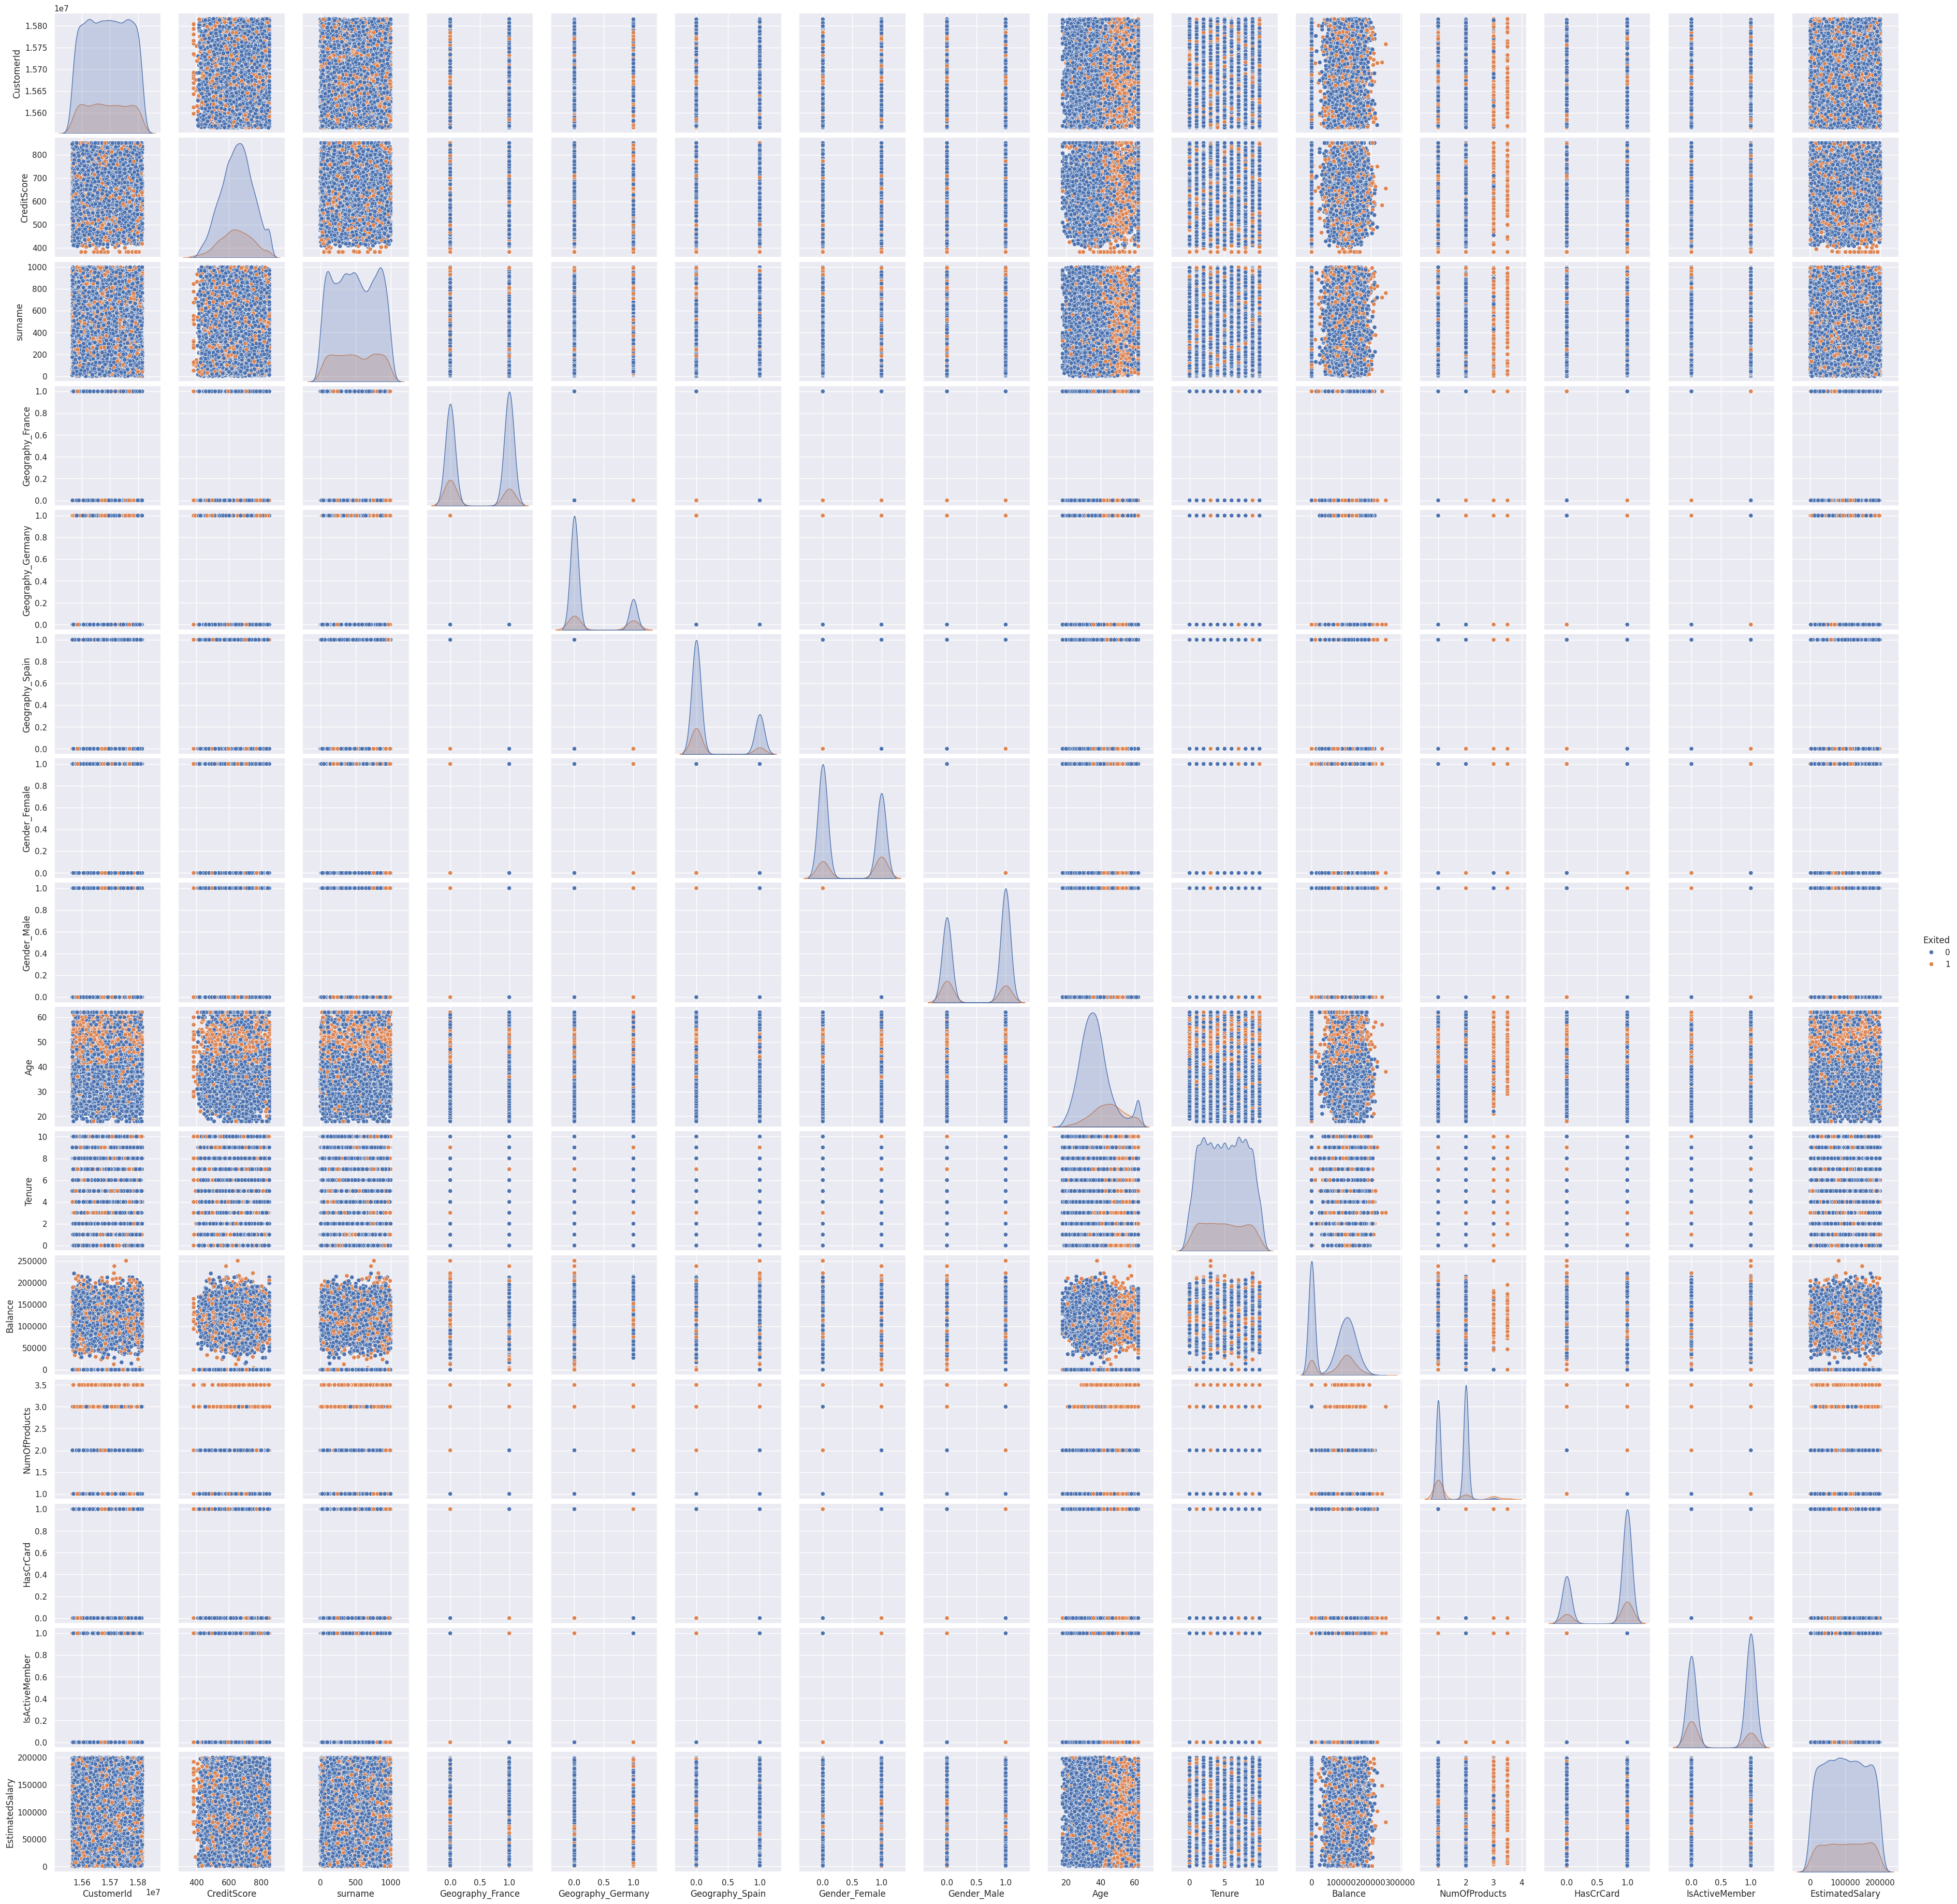

In [642]:
#visualisasi. warna dibedakan berdasarkan exitednya, apakah pelanggan berhenti berlangganan atau tidak
sns.pairplot(data, vars=['CustomerId', 'CreditScore', 'surname',
                         'Geography_France', 'Geography_Germany',
                         'Geography_Spain', 'Gender_Female',
                         'Gender_Male', 'Age', 'Tenure',
                         'Balance', 'NumOfProducts', 'HasCrCard',
                         'IsActiveMember',
                         'EstimatedSalary'], hue='Exited')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset.

sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel. data: Merupakan dataset yang digunakan untuk membuat pairplot. vars: Digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot. hue='Exited': Variabel 'Exited' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'Exited', yaitu apakah pelanggan telah berhenti berlangganan atau tidak. Dengan menggunakan pairplot dan membagi warna berdasarkan 'Exited', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah pelanggan telah berhenti berlangganan atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan pelanggan yang berlangganan.

In [643]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'Exited'
correlation_with_exited = data.corr()['Exited'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Exited'
print(correlation_with_exited)

Exited               1.000000
Age                  0.312436
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
EstimatedSalary      0.012097
surname              0.009584
CustomerId          -0.006248
HasCrCard           -0.007138
Tenure              -0.014001
RowNumber           -0.016571
CreditScore         -0.026455
Geography_Spain     -0.052667
NumOfProducts       -0.059196
Geography_France    -0.104955
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


output ini adalah nilai korelasi antara variabel 'Exited' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.


Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Misalnya, Usia (Age) memiliki korelasi sebesar 0.312436 dengan 'Exited'. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara usia pelanggan dan kemungkinan seorang pelanggan berhenti berlangganan (Outcome=1). Semakin tinggi usia pelanggan, semakin tinggi kemungkinan seseorang pelanggan berhenti berlangganan.


Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Misalnya, Skor Kredit -0.026455 dengan 'Exited'. Ini menunjukkan bahwa ada hubungan negatif antara skor kredit dan kemungkinan seorang pelanggan berhenti berlangganan (Outcome=1).


Korelasi Dekat dengan 0: Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'Exited'. Dalam kasus ini, variabel 'surname', 'CustumerId' dan 'HasCrCard' memiliki nilai korelasi yang cukup rendah dengan 'Exited', yang menunjukkan hubungan yang lemah dengan kemungkinan seorang pelanggan berhenti berlangganan.


Ringkasnya, nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'Exited' (pelanggan berhenti berlangganan atau tidak). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan keberadaan diabetes pada dataset.

#Memisahkan Variabel X dan Y

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (EXITED) dalam dataset.

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

Data y (Exited/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

Pemisahan ini penting karena:

Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

Validasi dan Evaluasi: Data y (exited) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [644]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['Exited'], axis=1)
y=data['Exited']

#MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING

Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.


Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


besarnya pembagian data:


Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:


Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.


Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.

In [645]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar)
y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)
test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.


Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.
X_test: Data testing untuk fitur-fitur.
y_train: Data training untuk target atau label.
y_test: Data testing untuk target atau label.
Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [646]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.73904781 0.44490496 0.09619238 ... 1.         0.         0.81917353]
 [0.92768554 0.73437644 0.91683367 ... 1.         1.         0.28545936]
 [0.29955991 0.06717502 0.85771543 ... 1.         0.         0.92818454]
 ...
 [0.32646529 0.03468969 0.09619238 ... 1.         0.         0.90717809]
 [0.98469694 0.39340052 0.1252505  ... 1.         1.         0.74376393]
 [0.27325465 0.10847779 0.60721443 ... 1.         0.         0.59427515]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

#NAIVE BAYES

In [647]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [648]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [649]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.81625

In [650]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [651]:
#import accuracy_score function
from sklearn.metrics import accuracy_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.8070


Berdasarkan output di atas, dengan menggunakan algoritma Naive Bayes menunjukkan tingkat akurasi sebesar 0,8070. Dalam konteks ini, angka 0,8070 berarti bahwa model berhasil memprediksi dengan benar 80,70% dari semua sampel pada data uji (y_test) yang telah digunakan.

#KNN

In [652]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
k = 100
knn = KNeighborsClassifier(n_neighbors=k)


In [653]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [654]:
# Memprediksi data uji
y_pred = knn.predict(X_test)

In [655]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi KNN (k={k}): {accuracy:.2f}")

Akurasi KNN (k=100): 0.80


Berdasarkan output di atas, dengan menggunakan algoritma Naive Bayes menunjukkan tingkat akurasi sebesar 0,80. Dalam konteks ini, angka 0,80 berarti bahwa model berhasil memprediksi dengan benar 80% dari semua sampel pada data uji (y_test) yang telah digunakan.

#Membandingkah Hasil Klasifikasi Naive Bayes dan KNN

Berdasarkan perhitungan yang telah dilakukan, dengan klasifikasi Naive Bayes, tingkat keakuratannya 80,7%, sedangkan klasifikasi KNN, tingkat keakuratannya 80%. Hal tersebut berarti tingkat keakuratan Naive Bayes untuk dataset ini lebih tinggi 0,7% dari KNN. Hal ini dapat terjadi karena klasifikasi Naive Bayes lebih akurat digunakan untuk data dengan asumsi bahwa setiap atributnya tidak saling berhubungan.

Sehingga dapat disimpulkan bahwa untuk dataset pelanggan yang berhenti berlangganan ini, lebih cocok dilakukan klasifikasi menggunakan algoritma Naive Bayes